# 1. Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions

# 2. Read the Training Data

In [2]:
file_path = r"C:\Users\Sher Mohammed Khan\OneDrive\Desktop\Coding\Python\Projects\ML Project\Flight_Price_Prediction\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-03,Delhi,Cochin,02:15:00,04:25:00,1570,1.0,No Info,17024
1,Vistara,2019-03-24,Kolkata,Banglore,07:10:00,18:45:00,695,1.0,No Info,16932
2,Spicejet,2019-04-09,Banglore,Delhi,09:30:00,12:20:00,170,0.0,No Info,4423
3,Indigo,2019-04-27,Banglore,Delhi,21:15:00,00:15:00,180,0.0,No Info,3943
4,Air India,2019-06-12,Delhi,Cochin,09:45:00,09:25:00,1420,1.0,No Info,7480
...,...,...,...,...,...,...,...,...,...,...
6831,Indigo,2019-06-03,Banglore,Delhi,04:00:00,06:50:00,170,0.0,No Info,3943
6832,Indigo,2019-06-24,Delhi,Cochin,05:05:00,16:10:00,665,1.0,No Info,6442
6833,Air India,2019-05-09,Banglore,Delhi,10:00:00,12:45:00,165,0.0,No Info,5228
6834,Jet Airways,2019-05-27,Delhi,Cochin,07:05:00,12:35:00,330,1.0,In-flight meal not included,12898


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
# Converting "date_of_journey", "dep_time", "arrival_time" to DateTime

train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

In [6]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# 3. High-Level Summary

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6836 entries, 0 to 6835
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6836 non-null   object        
 1   date_of_journey  6836 non-null   datetime64[ns]
 2   source           6836 non-null   object        
 3   destination      6836 non-null   object        
 4   dep_time         6836 non-null   datetime64[ns]
 5   arrival_time     6836 non-null   datetime64[ns]
 6   duration         6836 non-null   int64         
 7   total_stops      6835 non-null   float64       
 8   additional_info  6836 non-null   object        
 9   price            6836 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 534.2+ KB


In [8]:
train.describe()

,date_of_journey,dep_time,arrival_time,duration,total_stops,price
count,6836,6836,6836,6836.000000,6835.000000,6836.000000
mean,2019-05-04 23:14:42.621415936,2024-09-03 12:52:08.978935040,2024-09-03 13:44:59.517261312,637.543885,0.819166,9080.772528
min,2019-03-01 00:00:00,2024-09-03 00:20:00,2024-09-03 00:05:00,75.000000,0.000000,1759.000000
25%,2019-03-27 00:00:00,2024-09-03 08:00:00,2024-09-03 08:45:00,170.000000,0.000000,5228.000000
50%,2019-05-15 00:00:00,2024-09-03 11:50:00,2024-09-03 14:05:00,510.000000,1.000000,8366.000000
75%,2019-06-06 00:00:00,2024-09-03 18:00:00,2024-09-03 19:15:00,930.000000,1.000000,12373.000000
max,2019-06-27 00:00:00,2024-09-03 23:55:00,2024-09-03 23:55:00,2860.000000,3.000000,62427.000000
std,NaN,NaN,NaN,504.596337,0.676164,4607.406836


- **duration have extreme values min = 75.000000 to max = 2860.000000**

In [9]:
# Converting total_stops to object dtype for using in describe
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6836,6836,6836,6835.0,6836
unique,10,5,6,4.0,9
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2449,2860,2860,3583.0,5368


# 4. High-level analysis of Missing Values

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014628


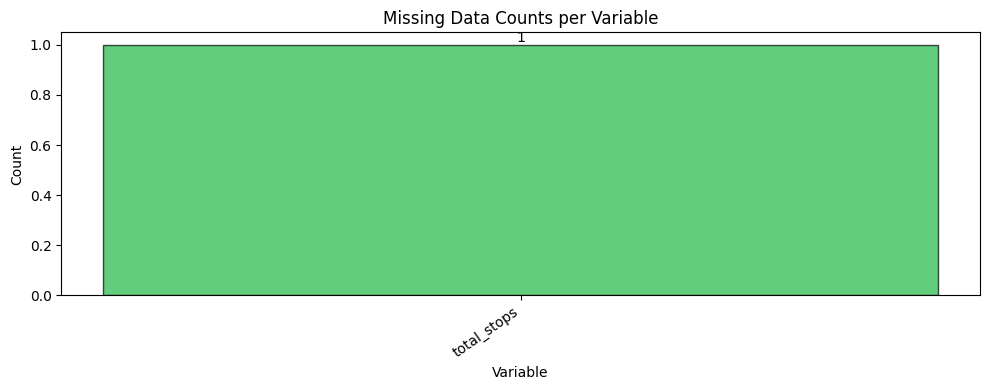

<Figure size 640x480 with 0 Axes>

In [11]:
eda_helper_functions.plot_missing_info(train)
plt.tight_layout()
plt.show()

In [12]:
# !pip install missingno

# 5. High-level analysis of Outliers

**Isolation Forest** is an anomaly detection algorithm that identifies outliers by isolating data points.

### Key Concepts:

- **Isolation**: The idea is that outliers are "few and different." They can be isolated (separated) more easily than normal data points.
- **Tree Structure**: The algorithm builds an ensemble of decision trees (isolation trees) by randomly selecting a feature and splitting the data at random values. The goal is to isolate each data point.
- **Path Length**: The number of splits required to isolate a point is the path length. Outliers, being isolated quickly, have shorter average path lengths in the trees.

### How It Works:

1. **Random Splitting**: The algorithm randomly selects features and splits the data to build the isolation trees.
2. **Isolation**: Since outliers are distinct, they tend to be isolated with fewer splits compared to normal points.
3. **Anomaly Score**: The algorithm computes an anomaly score based on the average path length across all trees. A higher score indicates a higher likelihood of being an outlier.

### Advantages:
- Efficient, with a linear time complexity.
- Works well for high-dimensional data.
- Doesn't require assumptions about the distribution of data.

### Summary:
Isolation Forest detects anomalies by randomly partitioning the data and identifying points that are isolated quickly, as outliers are easier to isolate.

In [13]:
from sklearn.ensemble import IsolationForest

forest = IsolationForest(n_estimators=10, random_state=42)
(
    train
    .dropna()
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = "price")
                                         .dropna()
                                         .select_dtypes(include="number"))) #IsolationForest works on numbers
    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-03,Delhi,Cochin,2024-09-03 02:15:00,2024-09-03 04:25:00,1570,1.0,No Info,17024,-1
3,Indigo,2019-04-27,Banglore,Delhi,2024-09-03 21:15:00,2024-09-03 00:15:00,180,0.0,No Info,3943,-1
4,Air India,2019-06-12,Delhi,Cochin,2024-09-03 09:45:00,2024-09-03 09:25:00,1420,1.0,No Info,7480,-1
5,Indigo,2019-06-21,Mumbai,Hyderabad,2024-09-03 09:10:00,2024-09-03 10:40:00,90,0.0,No Info,5755,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-09-03 05:30:00,2024-09-03 12:35:00,425,2.0,In-flight meal not included,15544,-1
...,...,...,...,...,...,...,...,...,...,...,...
6826,Indigo,2019-06-27,Delhi,Cochin,2024-09-03 05:10:00,2024-09-03 10:05:00,295,1.0,No Info,6496,-1
6828,Jet Airways,2019-06-06,Delhi,Cochin,2024-09-03 21:50:00,2024-09-03 19:00:00,1270,1.0,No Info,14714,-1
6829,Spicejet,2019-03-24,Kolkata,Banglore,2024-09-03 22:20:00,2024-09-03 00:40:00,140,0.0,No Info,5831,-1
6830,Indigo,2019-06-24,Mumbai,Hyderabad,2024-09-03 12:00:00,2024-09-03 13:30:00,90,0.0,No Info,2754,-1


- **According to IsolationForest we have 3337 outliers (-1) row based on numeric columns**

# 6. Pair Plots

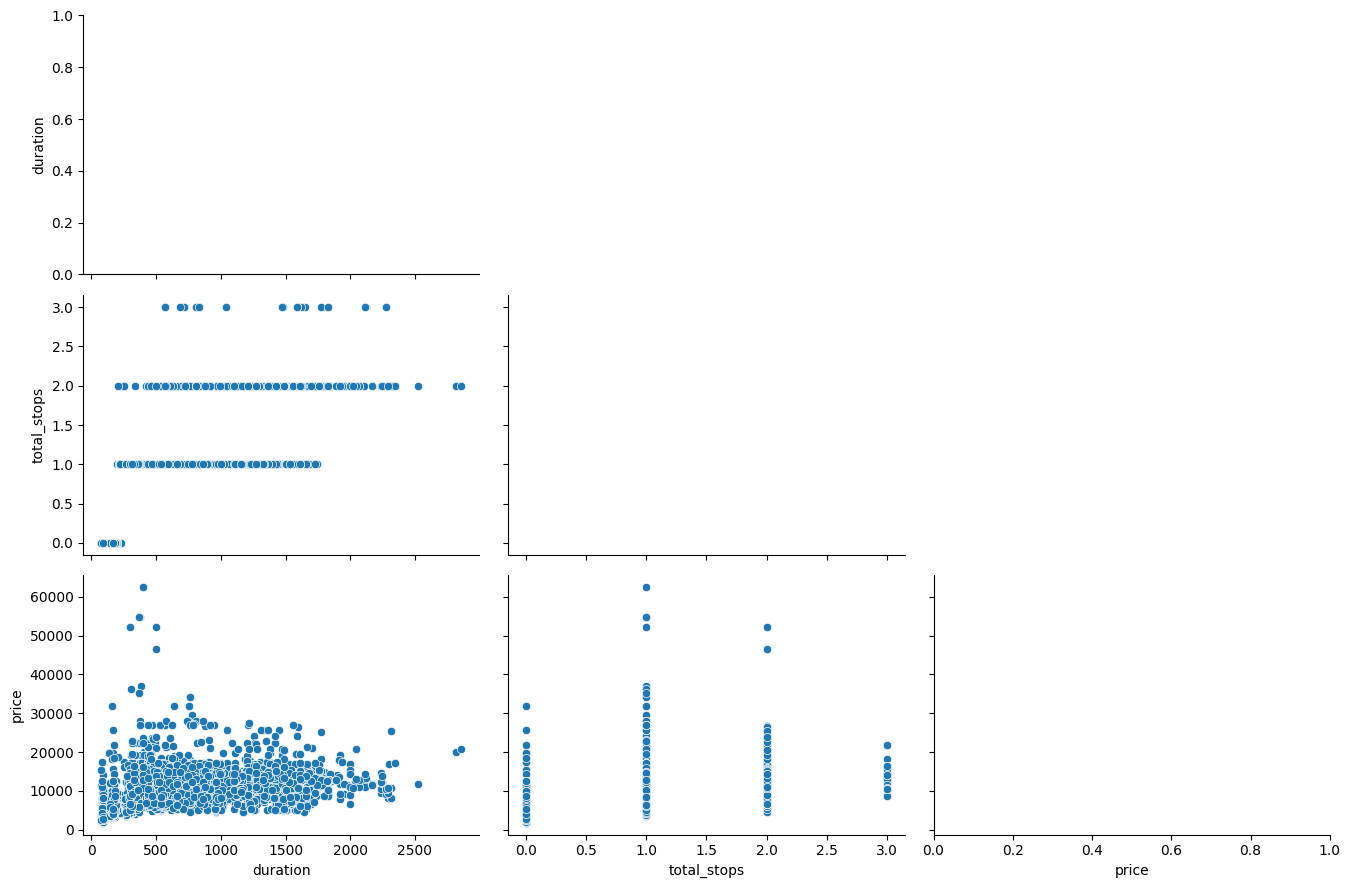

In [14]:
eda_helper_functions.pair_plots(train)
plt.savefig(fname = "pairplot")

1. **Price vs. Duration**:
   - There is a broad range of flight prices for different durations.
   - Longer flight durations tend to have a wide range of prices, but there is no clear linear relationship between duration and price.

2. **Price vs. Total Stops**:
   - Flights with 0 stops (direct flights) generally have a wide range of prices, suggesting other factors also influence the price.
   - Flights with more stops (e.g., 1 or 2 stops) don't seem to have significantly different price distributions from direct flights.

3. **Duration vs. Total Stops**:
   - As expected, flights with more stops generally have longer durations.
   - There is a clear distinction between the duration times for different numbers of stops.

# 7. Correlation Analysis

C:\Users\Sher Mohammed Khan\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


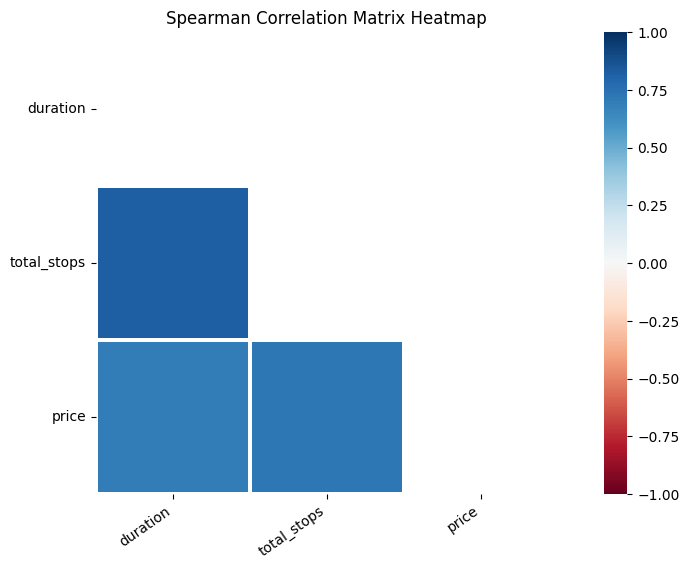

In [15]:
eda_helper_functions.correlation_heatmap(train)
plt.savefig("heatmap") 

### Observations:
1. **Strong Positive Correlation**:
   - There is a strong positive correlation between `total_stops` and `duration`. This suggests that as the number of stops increases, the duration of the journey tends to increase.

2. **Moderate Positive Correlation**:
   - There is a moderate positive correlation between `price` and `total_stops`, indicating that flights with more stops tend to be more expensive.

3. **Weak or No Correlation**:
   - The correlation between `price` and `duration` is weak or close to zero, suggesting that there isn't a strong linear relationship between the price of the flight and its duration.

<Axes: >

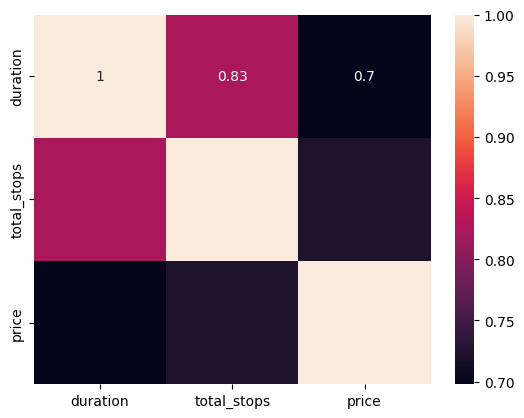

In [16]:
import seaborn as sns
sns.heatmap(train.corr(method="spearman", numeric_only = True), annot=True)

C:\Users\Sher Mohammed Khan\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


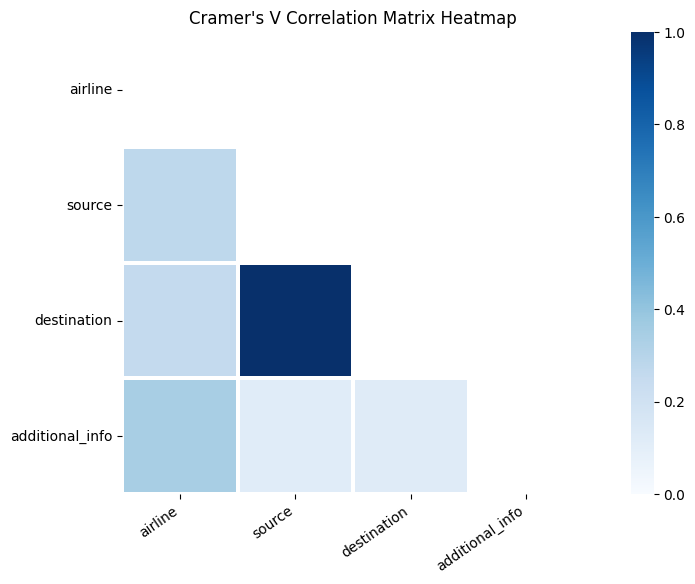

In [17]:
#for cateogrical
eda_helper_functions.cramersV_heatmap(train)
plt.savefig("cramersV_heatmap")

### Observations:
1. **Moderate to Strong Correlation**:
   - There is a moderate to strong correlation between `source` and `destination`. This suggests that the source and destination pairs are not independent, which is expected in most datasets involving flight routes.

2. **Weak Correlations**:
   - The correlations between `airline` and the other variables (`source`, `destination`, and `additional_info`) are weak. This implies that the choice of airline is not strongly related to the other variables.

   - Similarly, `additional_info` shows weak correlations with `source`, `destination`, and `airline`, indicating that additional information provided is relatively independent of these factors. 

Overall, the strongest correlation is observed between `source` and `destination`, while other variable pairs show weak or negligible correlations.

<Axes: >

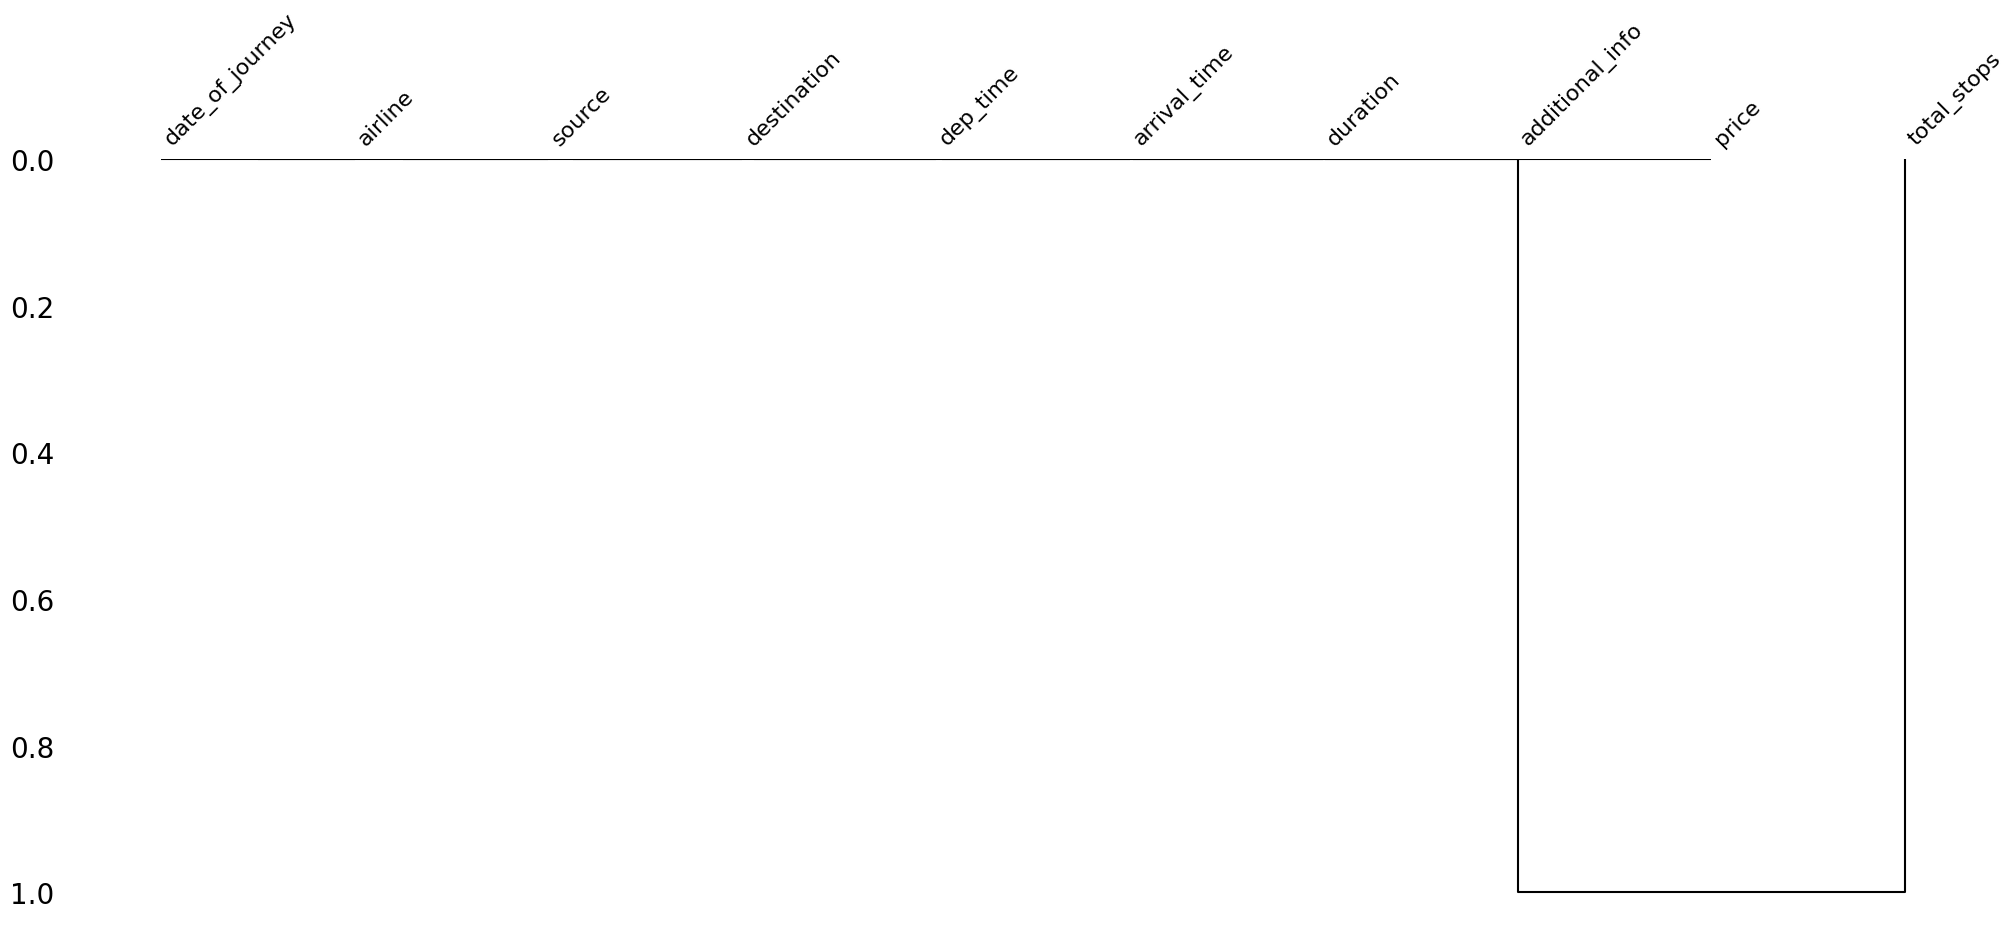

In [18]:
import missingno as msno

msno.dendrogram(train)

# 8. Detailed Analysis

In [19]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 airline

In [20]:
train.airline

0       Jet Airways
1           Vistara
2          Spicejet
3            Indigo
4         Air India
           ...     
6831         Indigo
6832         Indigo
6833      Air India
6834    Jet Airways
6835          Goair
Name: airline, Length: 6836, dtype: object

In [21]:
train.airline.unique()

array(['Jet Airways', 'Vistara', 'Spicejet', 'Indigo', 'Air India',
       'Multiple Carriers', 'Air Asia', 'Goair', 'Trujet', 'Jet Airways '],
      dtype=object)

In [22]:
train.airline.replace("Jet Airways ", "Jet Airways", inplace=True)

- **Replaced `Jet Airways ` with `Jet Airways`**

In [23]:
train.airline.unique()

array(['Jet Airways', 'Vistara', 'Spicejet', 'Indigo', 'Air India',
       'Multiple Carriers', 'Air Asia', 'Goair', 'Trujet'], dtype=object)

In [24]:
eda_helper_functions.cat_summary(train, "airline")

0       Jet Airways
1           Vistara
2          Spicejet
3            Indigo
4         Air India
           ...     
6831         Indigo
6832         Indigo
6833      Air India
6834    Jet Airways
6835          Goair
Name: airline, Length: 6836, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,
count,6836
unique,9
top,Jet Airways
freq,2453


,count,percentage
category,,
Jet Airways,2453,0.358836
Indigo,1341,0.196167
Air India,1131,0.165448
Multiple Carriers,754,0.110298
Spicejet,525,0.076799
Vistara,300,0.043885
Air Asia,207,0.030281
Goair,124,0.018139
Trujet,1,0.000146


In [25]:
train[train.airline == "Trujet"]

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
649,Trujet,2019-03-06,Mumbai,Hyderabad,2024-09-03 13:05:00,2024-09-03 16:20:00,195,1.0,No Info,4140


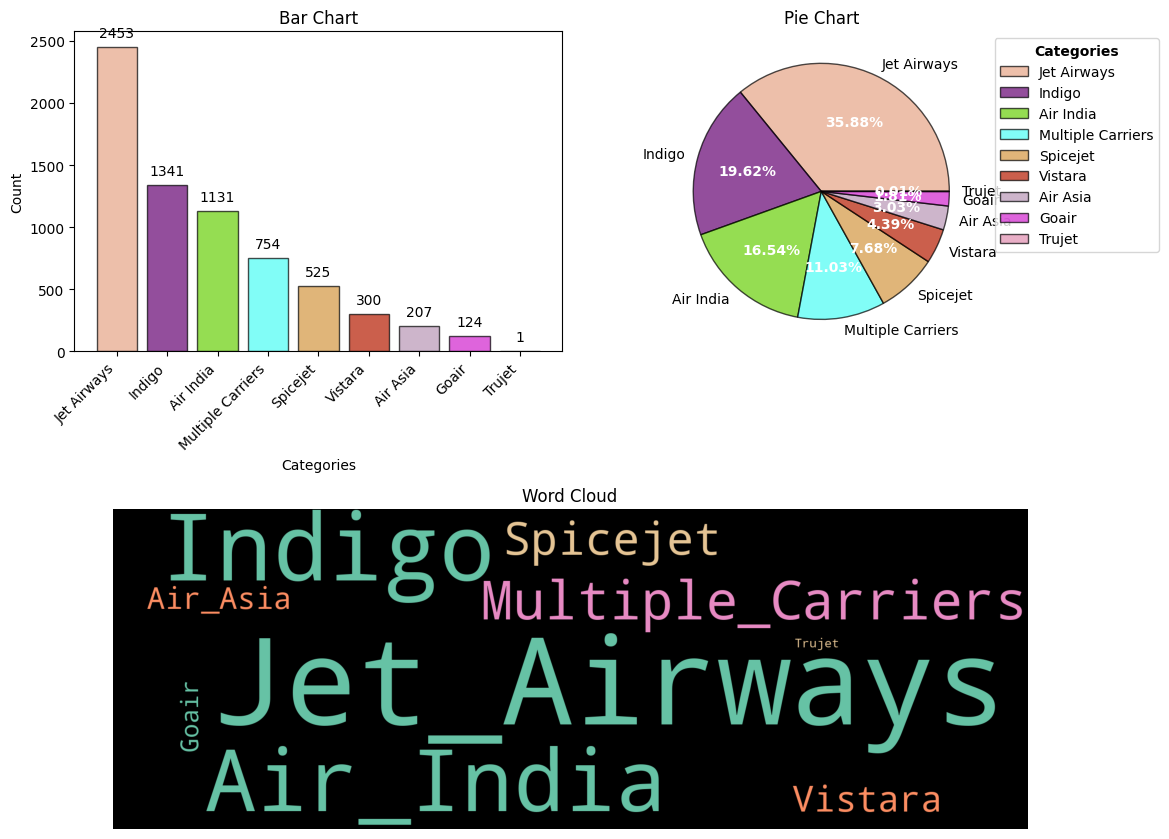

<Figure size 640x480 with 0 Axes>

In [26]:
eda_helper_functions.cat_univar_plots(train, "airline")
plt.tight_layout()

- We can retain top 4 category and group all rare the other as one category

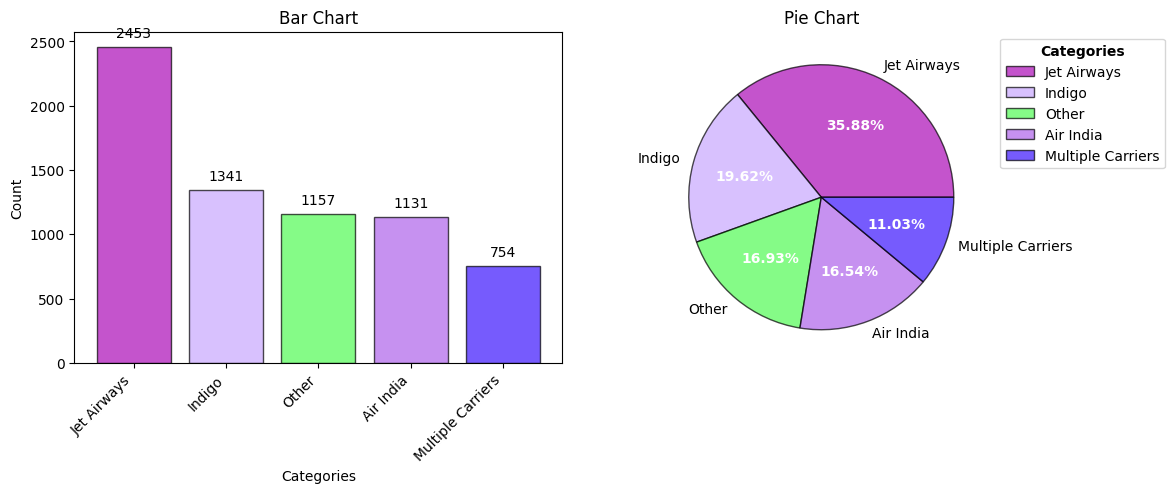

<Figure size 640x480 with 0 Axes>

In [27]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=4)
plt.tight_layout()

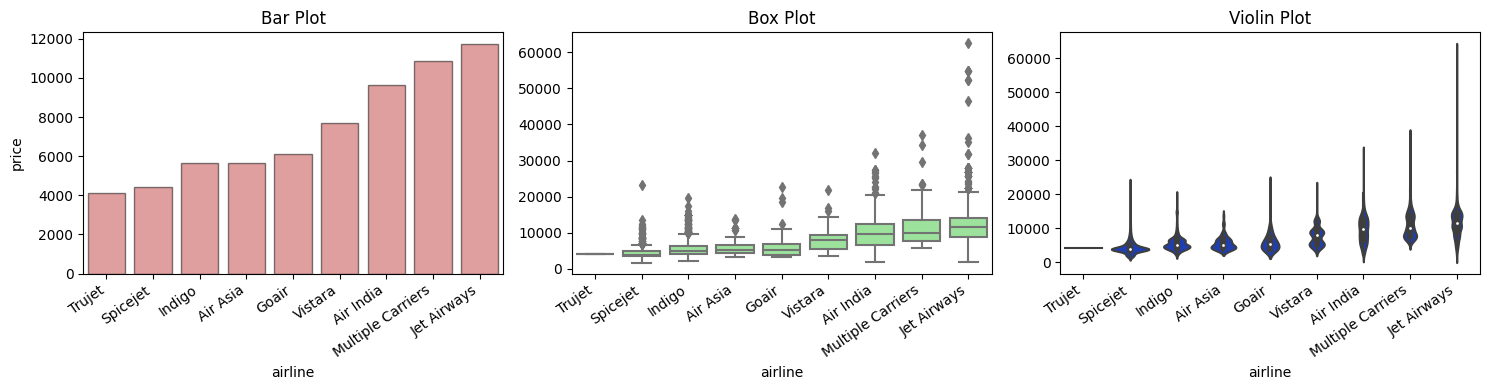

In [28]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

- Based on the airline price is varying. So, airline is a good feature to predicte price
- In box plot we can see we have potential outliers

A **hypothesis test** is a statistical method used to make decisions or inferences about a population based on sample data. It helps you determine whether there is enough evidence in your sample to support a specific claim (hypothesis) about the population.

### Key Components of Hypothesis Testing:

1. **Null Hypothesis (H₀)**: 
   - A statement that there is no effect or no difference, and it serves as the default assumption.
   - Example: "The average height of men and women is the same."

2. **Alternative Hypothesis (H₁ or Ha)**: 
   - A statement that contradicts the null hypothesis, suggesting there is an effect or a difference.
   - Example: "The average height of men is different from that of women."

3. **Test Statistic**: 
   - A value calculated from the sample data that is used to evaluate the hypotheses.
   - Example: A t-statistic in a t-test or a z-score in a z-test.

4. **P-Value**: 
   - The probability of obtaining the observed results, or more extreme ones, if the null hypothesis is true.
   - If the p-value is low (typically less than 0.05), it indicates strong evidence against the null hypothesis.

5. **Significance Level (α)**: 
   - The threshold for deciding whether to reject the null hypothesis, often set at 0.05.
   - If the p-value is less than α, you reject the null hypothesis.

6. **Conclusion**:
   - Based on the p-value and significance level, you either reject the null hypothesis or fail to reject it.

### Why Hypothesis Testing is Important:
- **Decision-Making**: It provides a structured method for making data-driven decisions.
- **Validating Claims**: Helps validate or refute claims about a population.
- **Scientific Research**: It’s fundamental in scientific research, where it’s used to test theories and models.

In summary, hypothesis testing allows you to use sample data to infer whether a certain claim about a population is likely to be true or false.

### ANOVA (Analysis of Variance)

**What it is:**
- ANOVA is a statistical method used to compare the means of three or more groups to see if at least one of the group means is statistically different from the others.

**When to use:**
- When you have a continuous dependent variable and a categorical independent variable with more than two categories (groups).
- For example, if you want to compare the average test scores of students across three different teaching methods, ANOVA would help determine if there's a statistically significant difference in the average scores among the three groups.

**How it works:**
- ANOVA tests the null hypothesis that all group means are equal.
- It partitions the total variance in the data into variance between the groups and variance within the groups.
- If the variance between groups is significantly larger than the variance within groups, it suggests that the group means are not all equal.

**Key Output:**
- **F-statistic**: A ratio that compares the variance between groups to the variance within groups.
- **p-value**: If the p-value is less than a predetermined significance level (e.g., 0.05), you reject the null hypothesis, indicating that at least one group mean is different.

### Kruskal-Wallis Test

**What it is:**
- The Kruskal-Wallis test is a non-parametric alternative to ANOVA. It compares the medians of three or more independent groups.

**When to use:**
- When your data does not meet the assumptions of ANOVA, such as the assumption of normality or homogeneity of variances.
- It’s used for ordinal data or when the data is not normally distributed.
- For example, if you're comparing the median customer satisfaction scores (ranked) across three different stores, you might use the Kruskal-Wallis test.

**How it works:**
- The test ranks all data points from all groups together and then compares the sum of ranks between the groups.
- It tests the null hypothesis that the distribution of ranks is the same across all groups.

**Key Output:**
- **H-statistic**: A test statistic that reflects the differences in ranks between groups.
- **p-value**: Similar to ANOVA, if the p-value is less than the significance level (e.g., 0.05), you reject the null hypothesis, suggesting that at least one group has a different median.

### Key Differences:
- **ANOVA** is parametric and assumes normally distributed data with equal variances across groups.
- **Kruskal-Wallis** is non-parametric and does not require normality or equal variances, making it more robust for non-normal or ordinal data.

In Exploratory Data Analysis (EDA), **ANOVA** and the **Kruskal-Wallis Test** are used to understand the relationships between different groups and to identify significant differences in their central tendencies (mean or median).

### Why Use ANOVA in EDA:
- **Comparing Group Means**: ANOVA helps to determine if the mean of a continuous variable differs significantly across multiple categorical groups.
- **Identifying Key Differences**: By identifying which groups differ significantly, ANOVA helps in forming hypotheses and guiding further analysis.
- **Checking Variability**: It helps to see how much of the total variability in the data is due to differences between groups versus within groups.

### Why Use Kruskal-Wallis Test in EDA:
- **Non-Normal Data**: When your data doesn't meet the assumptions of ANOVA, like normality or equal variances, the Kruskal-Wallis test is a robust alternative.
- **Ordinal Data**: It’s particularly useful when dealing with ordinal data (e.g., rankings) or when the data has outliers that affect the mean.
- **Group Comparisons**: Like ANOVA, it helps identify if there's a statistically significant difference in the central tendency (median) across groups.

### Overall Purpose in EDA:
Both tests help you identify patterns, differences, and relationships in your data early in the analysis process, guiding you toward more focused and effective modeling and decision-making.

In [29]:
eda_helper_functions.num_cat_hyp_testing(train, 
                                         num_var="price", 
                                         cat_var="airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 465.7842617722282
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3079.935515437591
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


### Multivariate Analysis between airline, destination and price

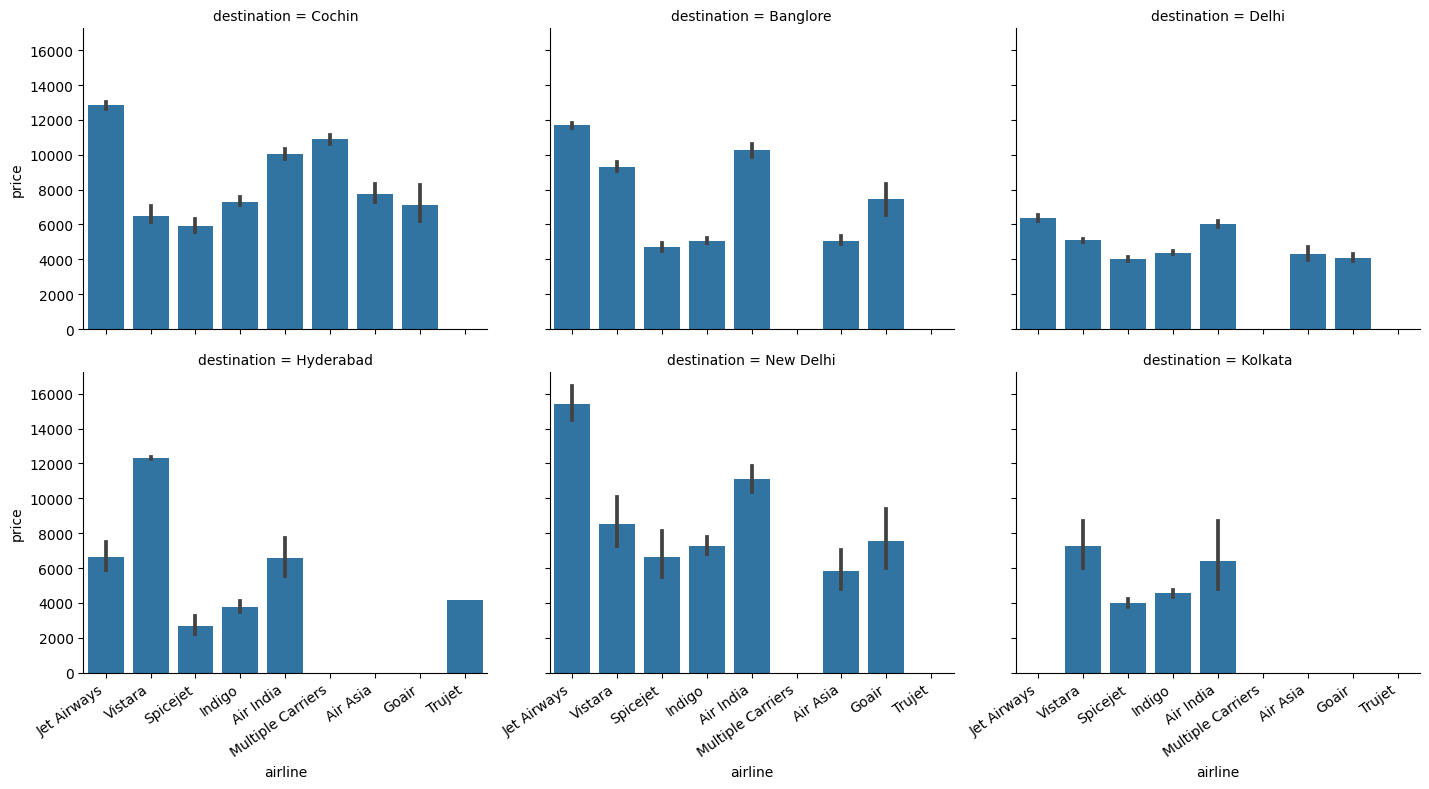

In [30]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

airline_grid = sns.FacetGrid(
    data= train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True)

airline_grid.map(sns.barplot, "airline", "price", order = train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

plt.tight_layout()

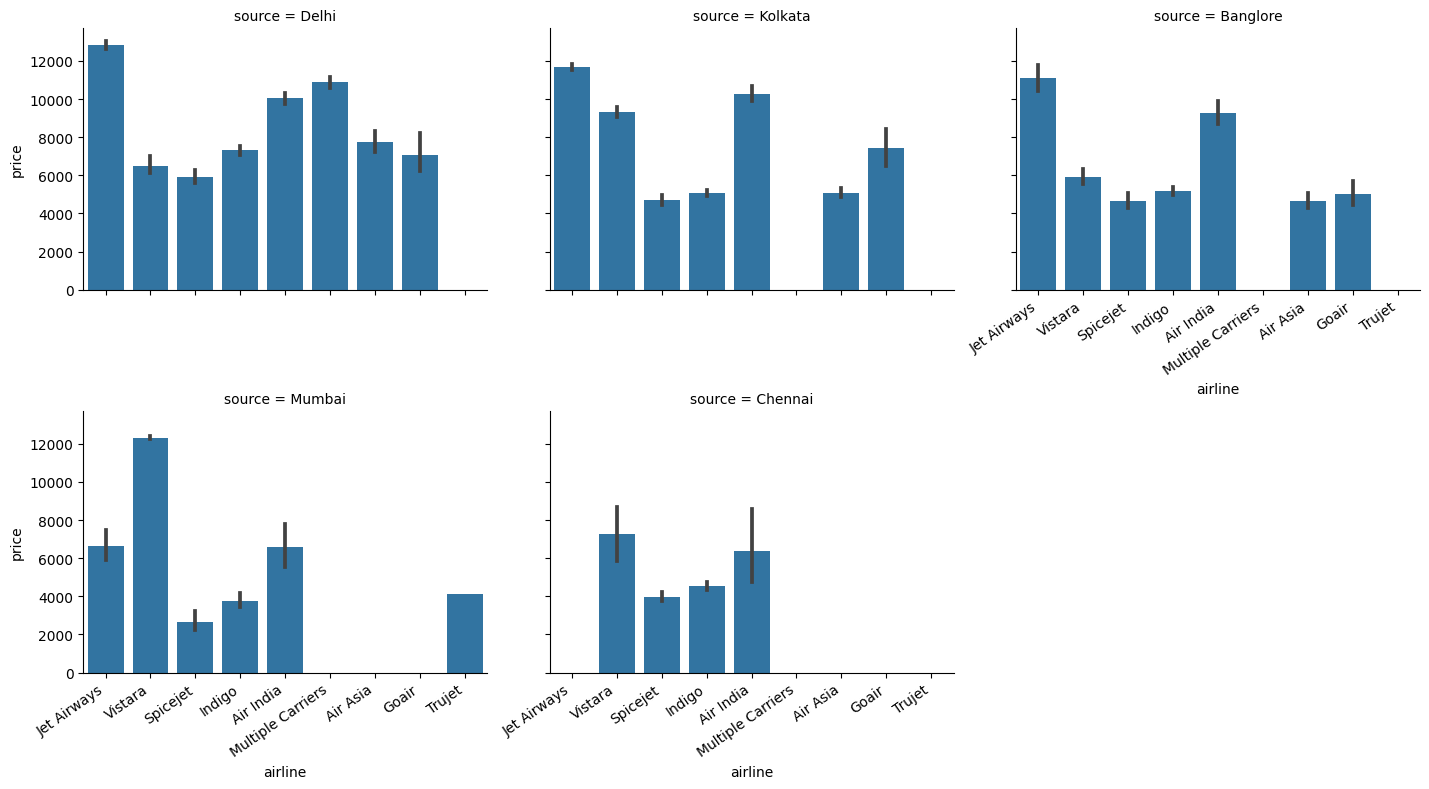

In [31]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

airline_grid = sns.FacetGrid(
    data= train,
    col="source",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True)

airline_grid.map(sns.barplot, "airline", "price", order = train.airline.unique())

for ax in airline_grid.axes[2:]:
    eda_helper_functions.rotate_xlabels(ax)
plt.tight_layout()

## 8.2 date_of_journey

In [32]:
train.date_of_journey

0      2019-03-03
1      2019-03-24
2      2019-04-09
3      2019-04-27
4      2019-06-12
          ...    
6831   2019-06-03
6832   2019-06-24
6833   2019-05-09
6834   2019-05-27
6835   2019-03-03
Name: date_of_journey, Length: 6836, dtype: datetime64[ns]

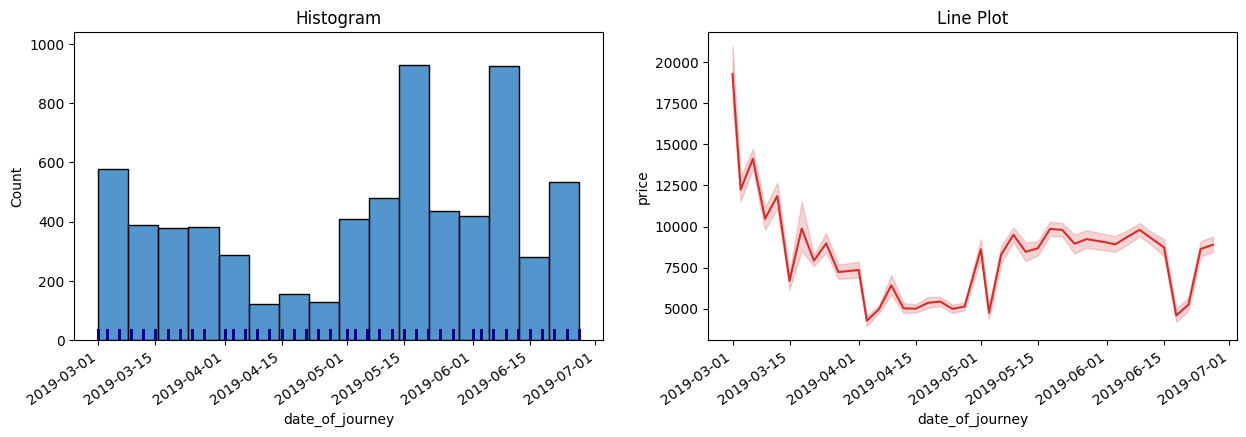

In [33]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

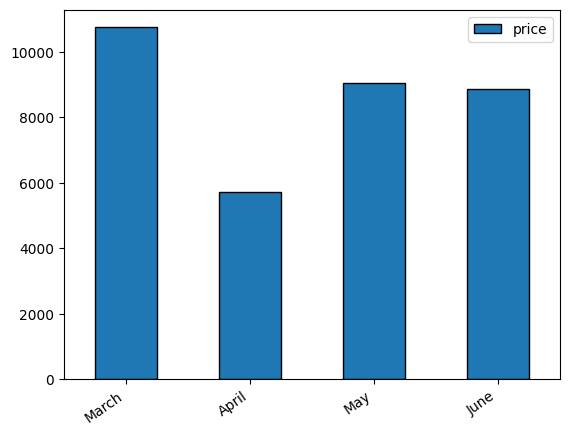

In [34]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq ="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"], axis=0)
    .plot(
        kind = "bar",
        edgecolor = "black"
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

- The `pd.Grouper` function allows you to group the data based on a particular time frequency. Here, the frequency is set to "M", which stands for "monthly".

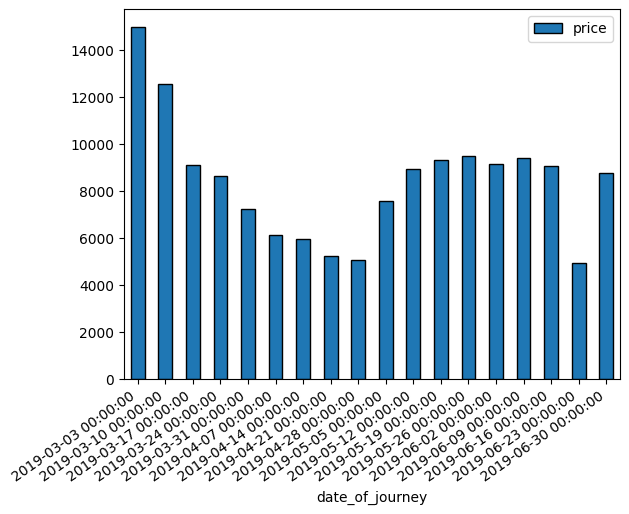

In [35]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq ="W"))
    .price.mean()
    .to_frame()
    # .set_axis(["March","April","May","June"], axis=0)
    .plot(
        kind = "bar",
        edgecolor = "black"
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

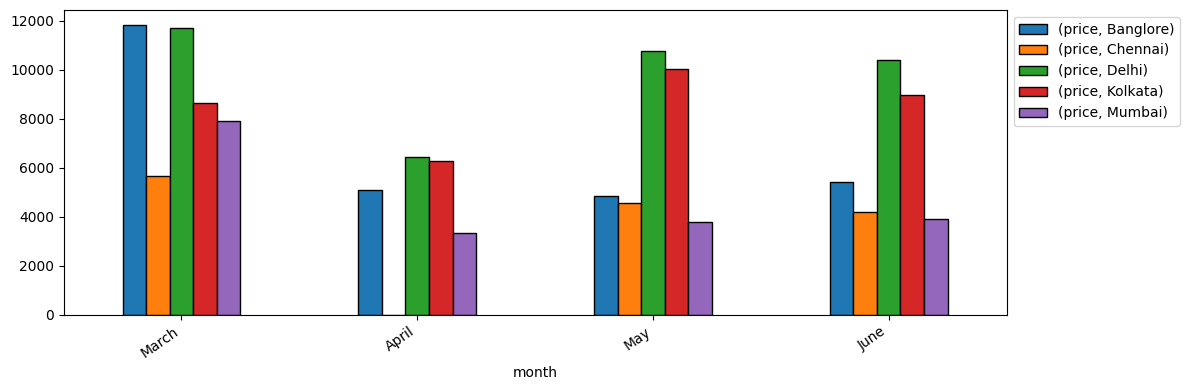

In [36]:
# Multivariate Analysis Monthly(date_of_journey) Average Price(price.mean) by Source(source)

(
    train
    .groupby([pd.Grouper(key = "date_of_journey", freq = "M"), "source"])
    .price.mean()
    .to_frame()
    .unstack(fill_value = 0)
    .set_axis(["March", "April", "May", "June"], axis = 0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12,4),
        edgecolor="black"
    )
)
ax = plt.gca()

ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)

eda_helper_functions.rotate_xlabels(ax)
plt.tight_layout()
plt.show()

## 8.3 dep_time

In [37]:
train.dep_time

0      2024-09-03 02:15:00
1      2024-09-03 07:10:00
2      2024-09-03 09:30:00
3      2024-09-03 21:15:00
4      2024-09-03 09:45:00
               ...        
6831   2024-09-03 04:00:00
6832   2024-09-03 05:05:00
6833   2024-09-03 10:00:00
6834   2024-09-03 07:05:00
6835   2024-09-03 14:10:00
Name: dep_time, Length: 6836, dtype: datetime64[ns]

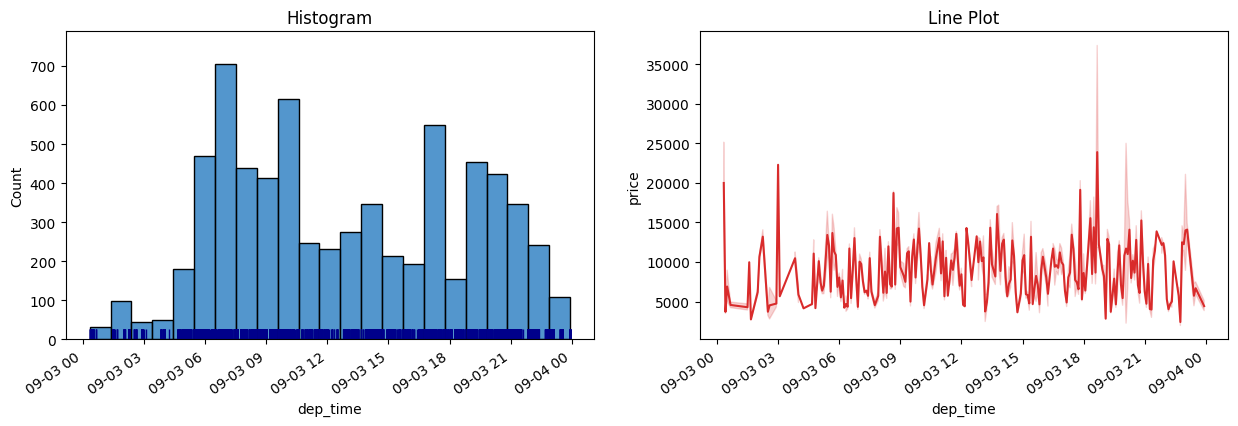

In [38]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="dep_time",
    target="price"
)

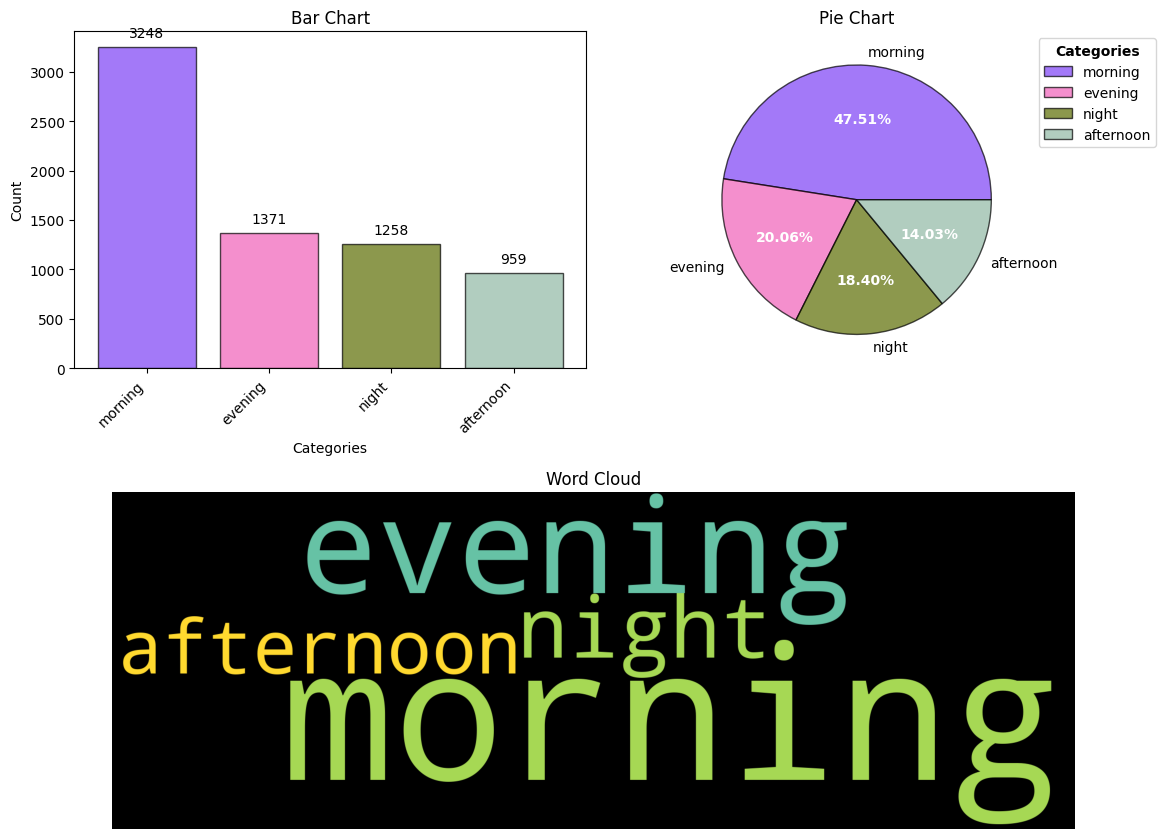

In [39]:
#Categorizing Departure Times and Visualizing Distribution by Time of Day
(
    train
    .assign(dep_time = lambda df_:
           np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
                      df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                      df_.dep_time.dt.hour.between(16, 20, inclusive="left"),],
                     ["morning",
                      "afternoon",
                      "evening"],
                     default = "night")
           )
    .pipe(eda_helper_functions.cat_univar_plots, "dep_time")
    
)

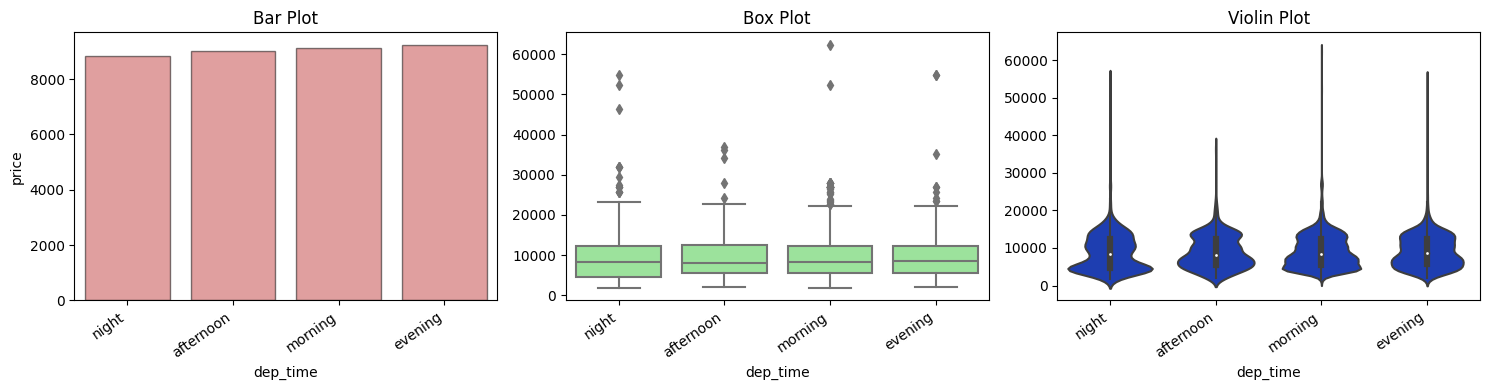

In [40]:
(
    train
    .assign(dep_time = lambda df_:
           np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
                      df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                      df_.dep_time.dt.hour.between(16, 20, inclusive="left"),],
                     ["morning",
                      "afternoon",
                      "evening"],
                     default = "night")
           )
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price", "dep_time")
    
)

## 8.4 duration
int column

In [41]:
train.duration

0       1570
1        695
2        170
3        180
4       1420
        ... 
6831     170
6832     665
6833     165
6834     330
6835     310
Name: duration, Length: 6836, dtype: int64

In [42]:
eda_helper_functions.num_summary(train, "duration")

0       1570
1        695
2        170
3        180
4       1420
        ... 
6831     170
6832     665
6833     165
6834     330
6835     310
Name: duration, Length: 6836, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,930.00
90,1440.00
95,1610.00
99,1843.25


,value
mean,637.543885
trimmed mean (5%),604.548261
trimmed mean (10%),576.163620
median,510.000000


,value
var,254617.463326
std,504.596337
IQR,760.000000
mad,340.000000
coef_variance,0.791469


,value
skewness,0.866765
kurtosis,-0.160317


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8873586058616638
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 254.55448369292935
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


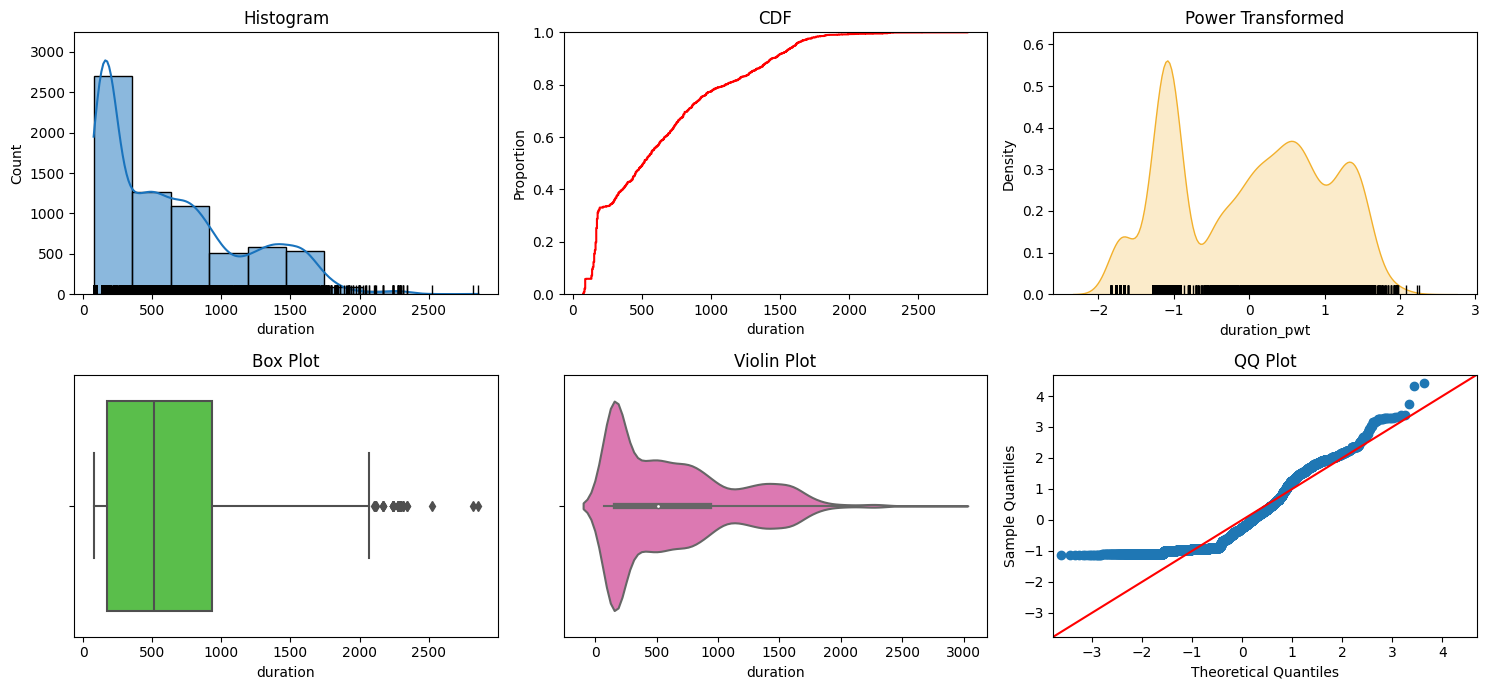

In [43]:
eda_helper_functions.num_univar_plots(train, "duration")

In [44]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5113889798824633
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978984138940473
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


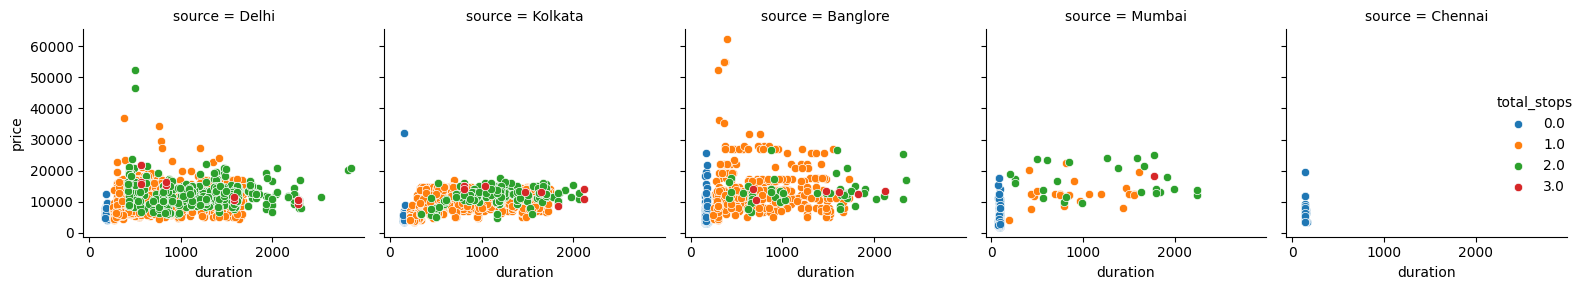

In [45]:
# Multivariate 

duration_gird = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_gird.map(sns.scatterplot, "duration", "price")
duration_gird.add_legend()

plt.tight_layout()
plt.show()

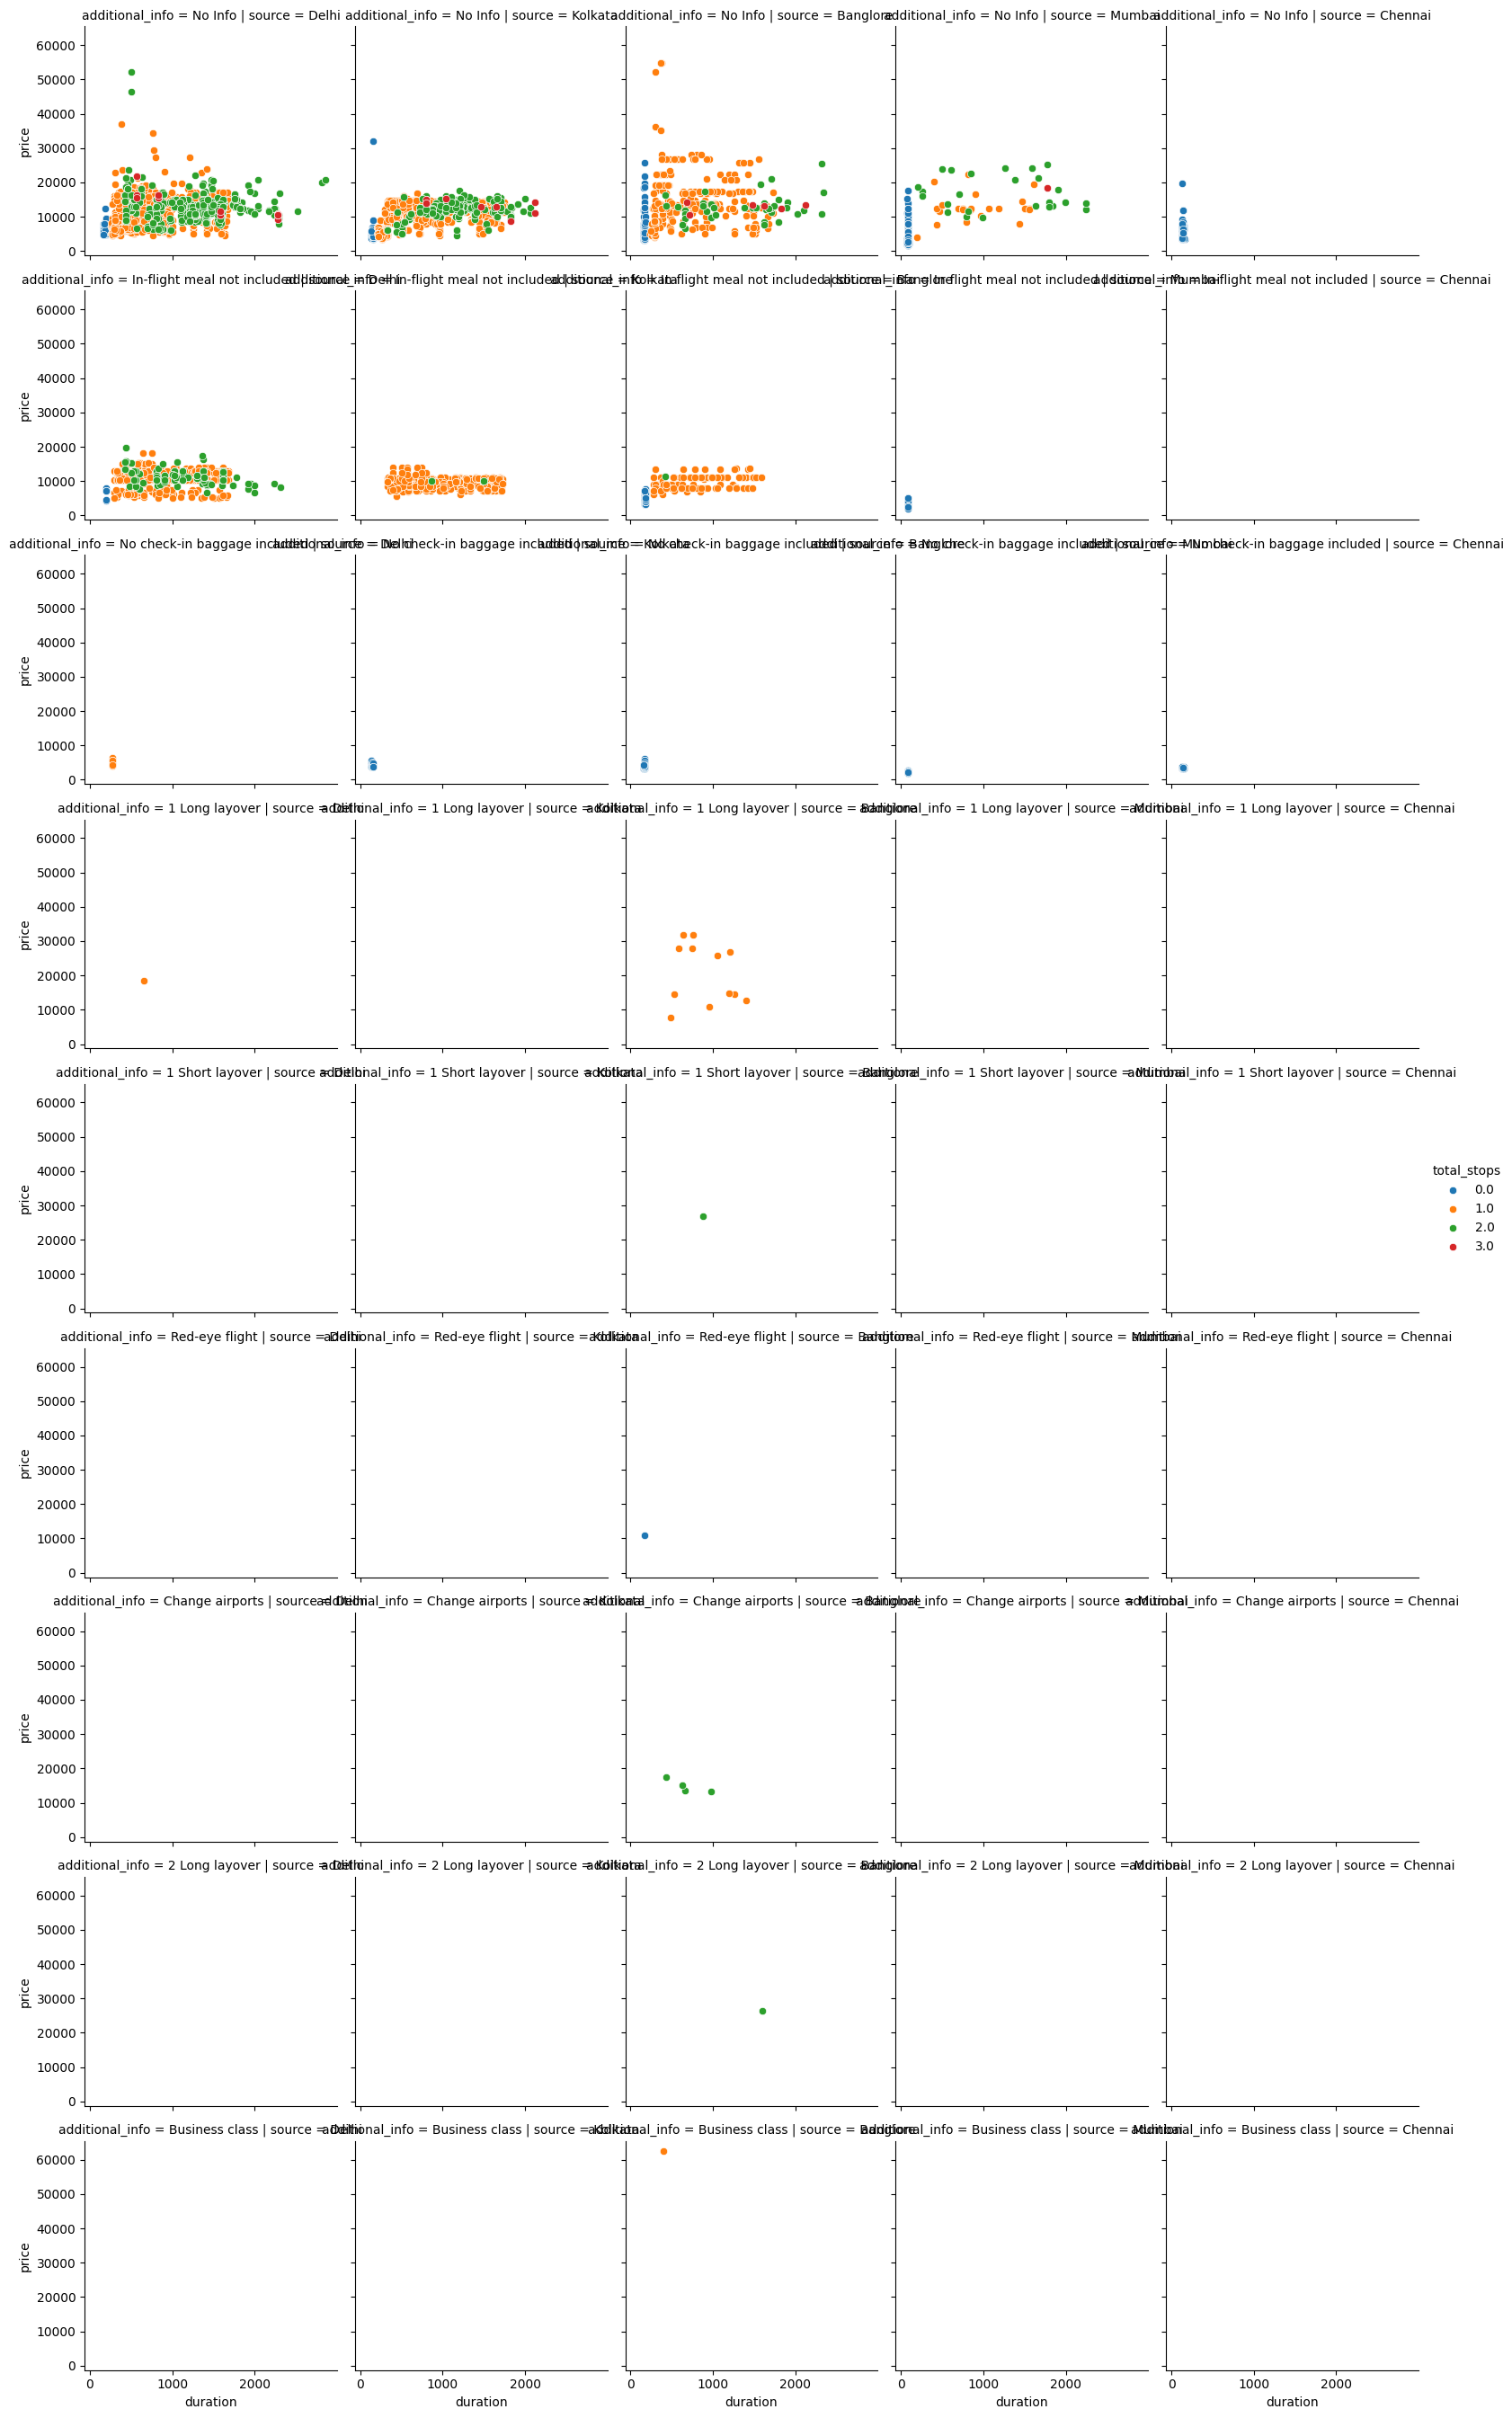

In [46]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()
plt.tight_layout()

In [47]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -970.0
Upper Limit : 2070.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
1060,Air India,2019-03-03,Banglore,New Delhi,2024-09-03 11:05:00,2024-09-03 22:10:00,2105,2.0,No Info,11791
3483,Air India,2019-05-12,Kolkata,Banglore,2024-09-03 12:00:00,2024-09-03 23:15:00,2115,3.0,No Info,10991
1912,Air India,2019-03-24,Kolkata,Banglore,2024-09-03 12:00:00,2024-09-03 23:15:00,2115,3.0,No Info,14221
1168,Air India,2019-03-12,Banglore,New Delhi,2024-09-03 06:45:00,2024-09-03 18:05:00,2120,3.0,No Info,13387
2379,Air India,2019-03-03,Delhi,Cochin,2024-09-03 07:05:00,2024-09-03 19:15:00,2170,2.0,No Info,11552
6335,Air India,2019-03-06,Delhi,Cochin,2024-09-03 07:05:00,2024-09-03 19:15:00,2170,2.0,No Info,11552
6111,Air India,2019-03-03,Delhi,Cochin,2024-09-03 07:05:00,2024-09-03 19:15:00,2170,2.0,No Info,11762
3104,Air India,2019-03-06,Delhi,Cochin,2024-09-03 07:05:00,2024-09-03 19:15:00,2170,2.0,No Info,11552
5107,Air India,2019-05-21,Delhi,Cochin,2024-09-03 05:55:00,2024-09-03 19:15:00,2240,2.0,No Info,10493
666,Air India,2019-06-09,Delhi,Cochin,2024-09-03 05:55:00,2024-09-03 19:15:00,2240,2.0,No Info,10493


## 8.5 additional_info

In [48]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
6831                        No Info
6832                        No Info
6833                        No Info
6834    In-flight meal not included
6835                        No Info
Name: additional_info, Length: 6836, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,
count,6836
unique,9
top,No Info
freq,5368


,count,percentage
category,,
No Info,5368,0.785255
In-flight meal not included,1249,0.182709
No check-in baggage included,198,0.028964
1 Long layover,13,0.001902
Change airports,4,0.000585
1 Short layover,1,0.000146
Red-eye flight,1,0.000146
2 Long layover,1,0.000146
Business class,1,0.000146


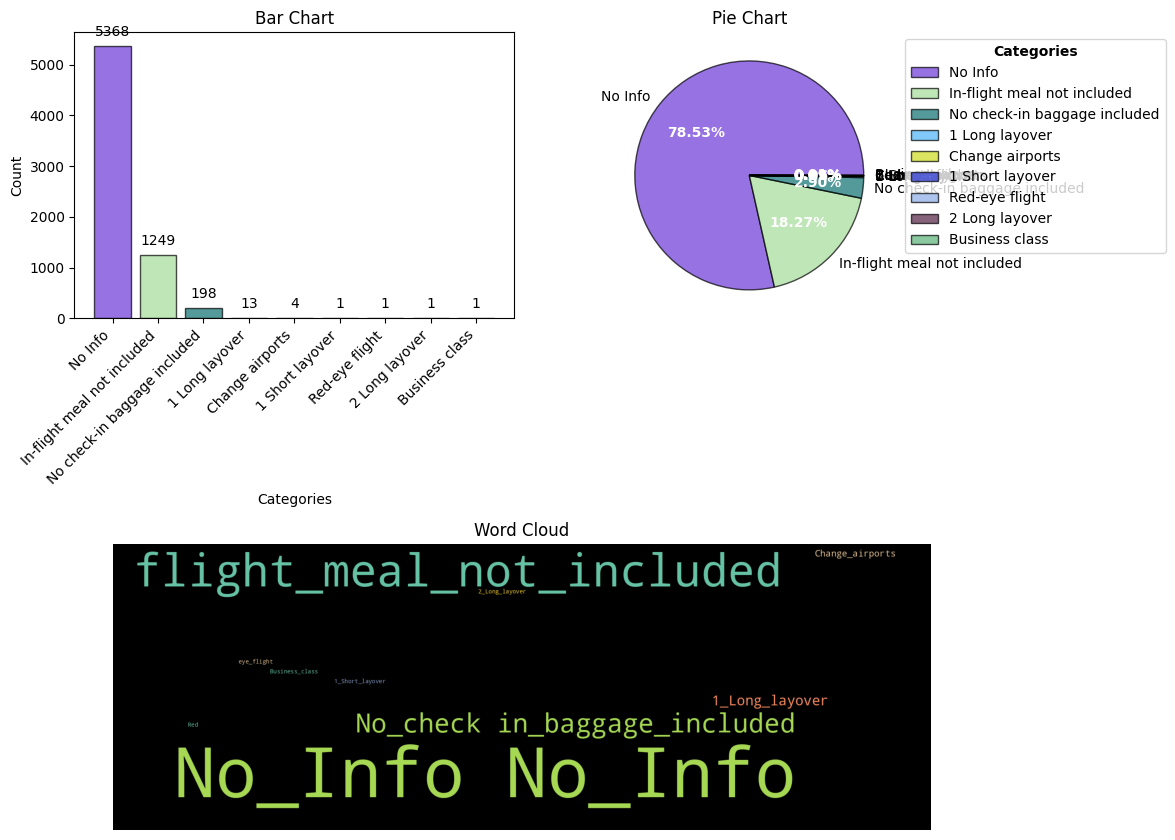

In [49]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

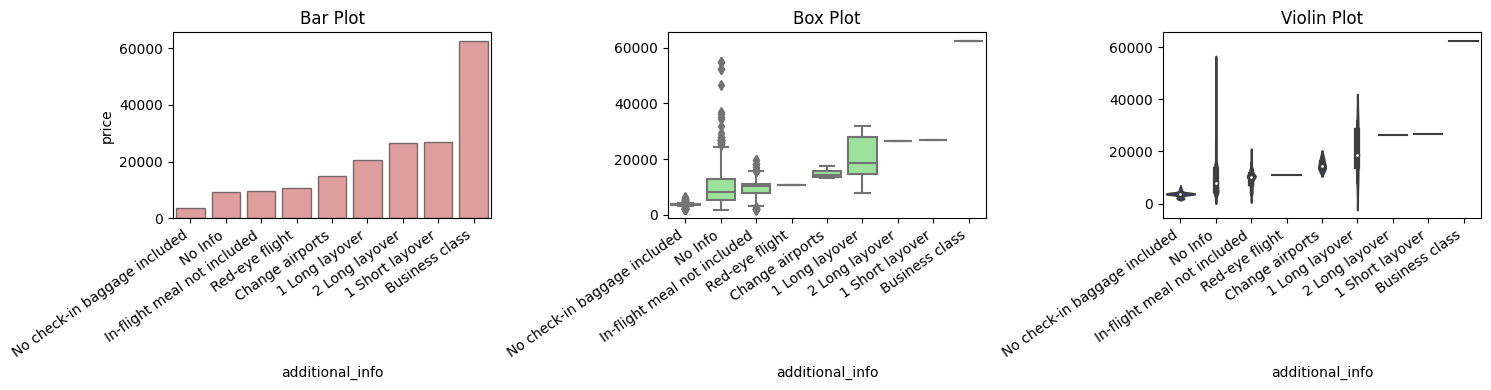

In [50]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

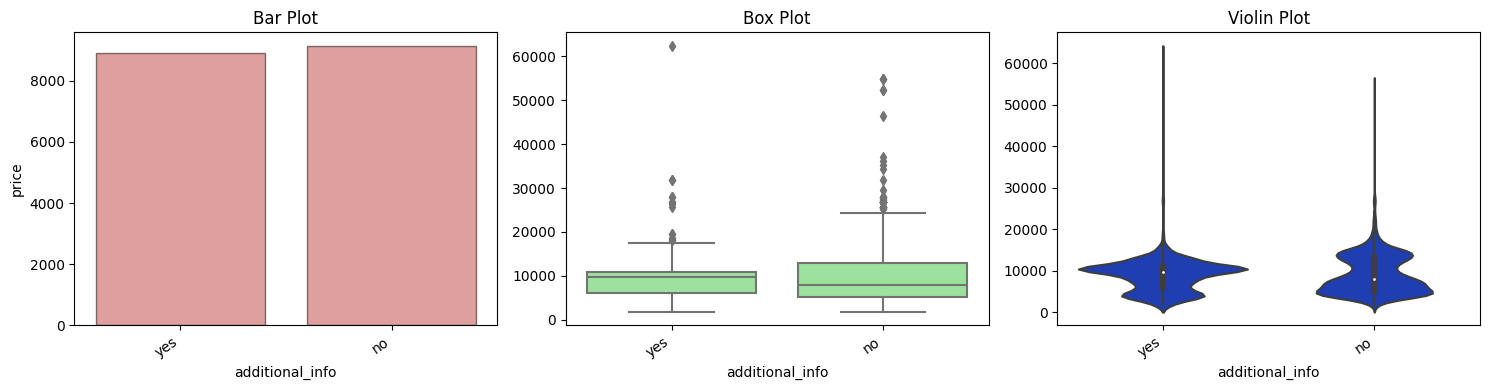

In [51]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- additional_info has severely rare categories
- Converted it into a binary feature for further analysis

# 9. Automated EDA

Libraries
- Pandas Profiling (ydata-profiling)
- Sweetviz
- Autoviz
- D-Tale

In [52]:
from ydata_profiling import ProfileReport

In [53]:
report = ProfileReport(train)

In [57]:
# report.to_file(output_file="eda_output_of_train.html")

- matplotlib = ">=3.2,<=3.7.3"
- ydata-profiling = "^4.4,<4.5"